# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.9.1'

## Part 1 - Data Preprocessing

### Preprocessing the image Dataset

Split the main image folder into a train and a test folder, should only need to do it once then use new created folders

In [ ]:
import splitfolders
splitfolders.ratio('Data/PetImages', output="Data/PetImages_Split", seed=1337, ratio=(.8, 0,0.2))

In [3]:
## Create Training Dataset

# first we create an image generator that adjusts some of the images to make various version
# it does things like rotate images, zoom images, flip them sct.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# creating the actual training set, look for data and fo our case we will make them 64x64 pixels, 
# mainly because this is my personal PC not a supercomputer
training_set = train_datagen.flow_from_directory('Data/PetImages_Split/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 10476 images belonging to 2 classes.


In [4]:
## creating the test set
# note we dont need to flip or rotte them ect. as theey arnt being used to train the model
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Data/PetImages_Split/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2620 images belonging to 2 classes.


## Part 2 - Building the CNN

In [5]:
## initilising the CNN
cnn = tf.keras.models.Sequential()

## Convulution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

## Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## adding second convolution layer, includes a second pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## flattening
cnn.add(tf.keras.layers.Flatten())

## connecting the ANN
# well only add 1 hidden layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


## Part 3 - Training the CNN

### Compiling the CNN

In [6]:
??cnn.fit

In [7]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
cnn.fit(x = training_set, validation_data = test_set,  epochs = 25)

Epoch 1/25
328/328 [==============================] - 28s 84ms/step - loss: 0.6550 - accuracy: 0.6057 - val_loss: 0.5926 - val_accuracy: 0.6798
Epoch 2/25
328/328 [==============================] - 27s 83ms/step - loss: 0.5705 - accuracy: 0.7025 - val_loss: 0.5203 - val_accuracy: 0.7439
Epoch 3/25
328/328 [==============================] - 27s 84ms/step - loss: 0.5355 - accuracy: 0.7291 - val_loss: 0.4787 - val_accuracy: 0.7740
Epoch 4/25
328/328 [==============================] - 27s 84ms/step - loss: 0.4999 - accuracy: 0.7506 - val_loss: 0.4632 - val_accuracy: 0.7813
Epoch 5/25
328/328 [==============================] - 27s 84ms/step - loss: 0.4738 - accuracy: 0.7737 - val_loss: 0.4633 - val_accuracy: 0.7882
Epoch 6/25
328/328 [==============================] - 28s 84ms/step - loss: 0.4454 - accuracy: 0.7905 - val_loss: 0.4548 - val_accuracy: 0.7870
Epoch 7/25
328/328 [==============================] - 27s 83ms/step - loss: 0.4333 - accuracy: 0.7989 - val_loss: 0.4413 - val_accuracy:

Final Accuracies are very high 98% quite liekly that this data has been overfit as 100 epochs may very well be wat to many.

maybe re reun and dont have 100 epochs and have 20-25 instead

Retried on 25 and accuracy seemed more reasonable and it predicted well

## Part 4 - Making a single prediction

In [9]:
## change the path of the file to any file to test, PetImagesVal has two sub folders 
## one for dog one for cat, and about ten pictures of each inside
path = 'Data/PetImagesVal/The_Cat.jpg'

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

test_image = tf.keras.utils.load_img(path, target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 [==============================] - 0s 61ms/step


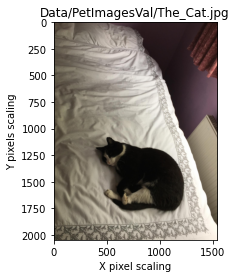

dog


In [11]:
plt.title(path)
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread(path)
plt.imshow(image)
plt.show()

print(prediction)

## batch check the folders for correct and incorrect guesses

In [27]:
import os
path ='Data/PetImagesVal/Cat'
Cats = []

for root, dirs, files in os.walk(path):
    for file in files:
        Cats.append(os.path.join(root,file))
        
path ='Data/PetImagesVal/Dog'
Dogs = []

for root, dirs, files in os.walk(path):
    for file in files:
        Dogs.append(os.path.join(root,file))
    

1/1 [==============================] - 0s 14ms/step


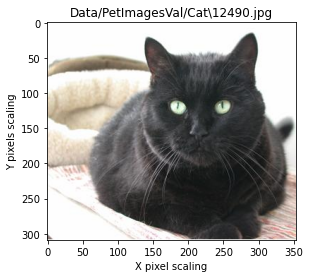

cat
1/1 [==============================] - 0s 12ms/step


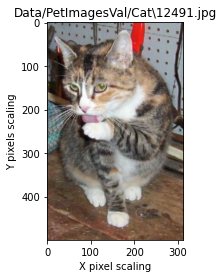

cat
1/1 [==============================] - 0s 13ms/step


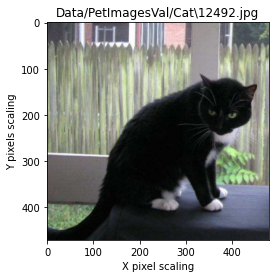

cat
1/1 [==============================] - 0s 13ms/step


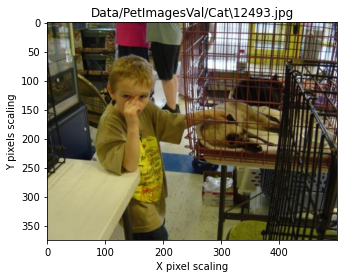

dog
1/1 [==============================] - 0s 13ms/step


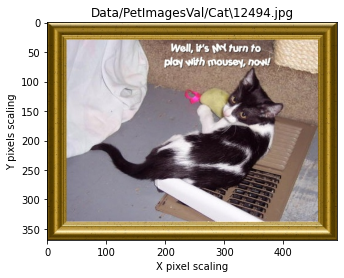

dog
1/1 [==============================] - 0s 12ms/step


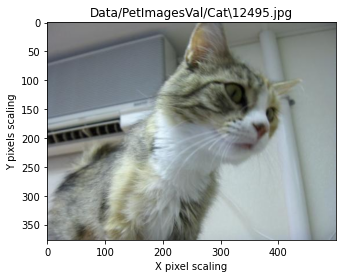

dog
1/1 [==============================] - 0s 12ms/step


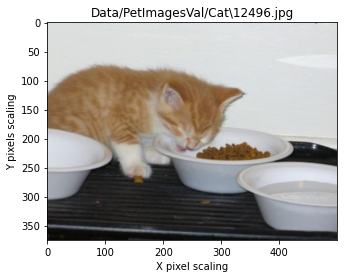

cat
1/1 [==============================] - 0s 13ms/step


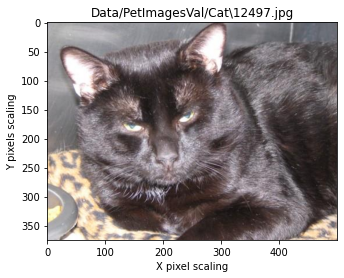

dog
1/1 [==============================] - 0s 12ms/step


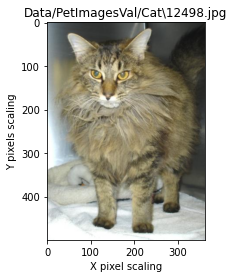

dog
1/1 [==============================] - 0s 12ms/step


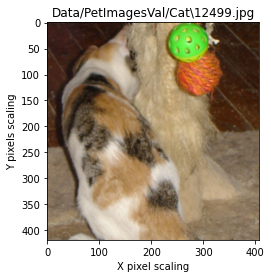

dog
1/1 [==============================] - 0s 12ms/step


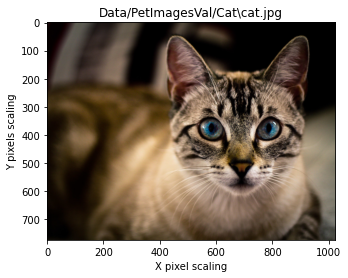

dog
4 7


In [28]:
correct = 0
Incorrect = 0
for path in Cats:
    test_image = tf.keras.utils.load_img(path, target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
        
    plt.title(path)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
 
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.show()

    if prediction == 'cat':
        correct = correct + 1
    else:
        Incorrect = Incorrect + 1
        
    print(prediction)

print(correct, Incorrect)

1/1 [==============================] - 0s 12ms/step


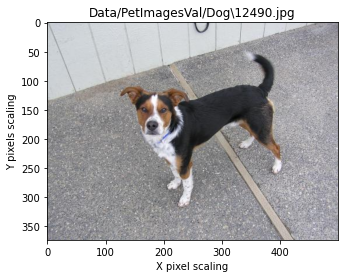

dog
1/1 [==============================] - 0s 12ms/step


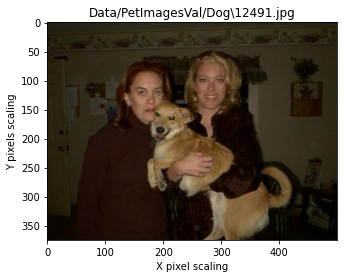

dog
1/1 [==============================] - 0s 13ms/step


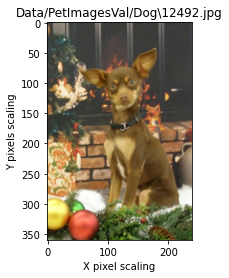

dog
1/1 [==============================] - 0s 13ms/step


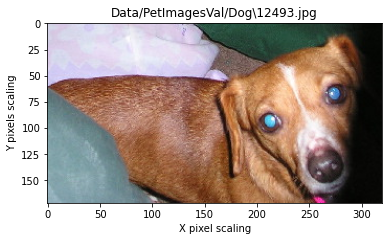

cat
1/1 [==============================] - 0s 12ms/step


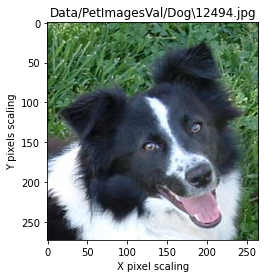

cat
1/1 [==============================] - 0s 11ms/step


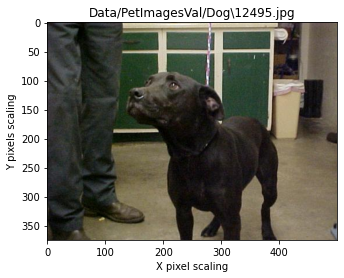

dog
1/1 [==============================] - 0s 13ms/step


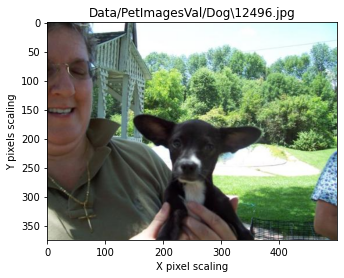

dog
1/1 [==============================] - 0s 12ms/step


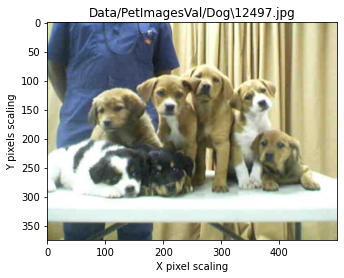

dog
1/1 [==============================] - 0s 12ms/step


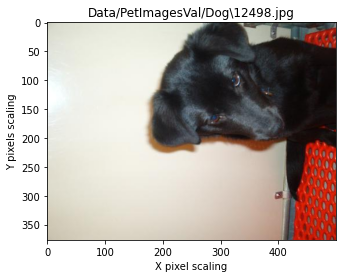

dog
1/1 [==============================] - 0s 12ms/step


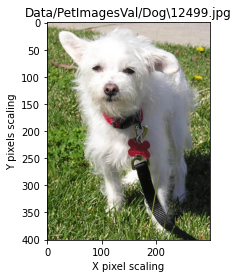

dog
8 2


In [24]:
correct = 0
Incorrect = 0
for path in Dogs:
    test_image = tf.keras.utils.load_img(path, target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
        
    plt.title(path)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
 
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.show()
    
    if prediction == 'dog':
        correct = correct + 1
    else:
        Incorrect = Incorrect + 1

    print(prediction)
    
print(correct, Incorrect)

## Final thoughts

Model functions, however it is quite bad at predicting an image of a cat. Maybe the dataset is just less clear for cats or maybe I can tuning the parameters a little better or other things. however I think  this is a satisfactory result for a demo of how to construct a conveluted nueral net.

Below I try to change the size param to improve the resolution and we do get some benifits so there is definitly a possibility we can have the model preform very well with some more hyper paramet tuning.

## Lets try not reducin the size of the images as much and try again

In [29]:
## Create Training Dataset

# first we create an image generator that adjusts some of the images to make various version
# it does things like rotate images, zoom images, flip them sct.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# creating the actual training set, look for data and fo our case we will make them 64x64 pixels, 
# mainly because this is my personal PC not a supercomputer
training_set = train_datagen.flow_from_directory('Data/PetImages_Split/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 10476 images belonging to 2 classes.


In [30]:
## creating the test set
# note we dont need to flip or rotte them ect. as theey arnt being used to train the model
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Data/PetImages_Split/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2620 images belonging to 2 classes.


## Part 2 - Building the CNN

In [31]:
## initilising the CNN
cnn = tf.keras.models.Sequential()

## Convulution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

## Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## adding second convolution layer, includes a second pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## flattening
cnn.add(tf.keras.layers.Flatten())

## connecting the ANN
# well only add 1 hidden layer
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

## Output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


## Part 3 - Training the CNN

### Compiling the CNN

In [32]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
cnn.fit(x = training_set, validation_data = test_set,  epochs = 25)

Epoch 1/25
328/328 [==============================] - 73s 222ms/step - loss: 0.6902 - accuracy: 0.5765 - val_loss: 0.5988 - val_accuracy: 0.6721
Epoch 2/25
328/328 [==============================] - 70s 215ms/step - loss: 0.6075 - accuracy: 0.6777 - val_loss: 0.5824 - val_accuracy: 0.7050
Epoch 3/25
328/328 [==============================] - 71s 216ms/step - loss: 0.5562 - accuracy: 0.7174 - val_loss: 0.5230 - val_accuracy: 0.7420
Epoch 4/25
328/328 [==============================] - 71s 217ms/step - loss: 0.5055 - accuracy: 0.7531 - val_loss: 0.5437 - val_accuracy: 0.7168
Epoch 5/25
328/328 [==============================] - 71s 215ms/step - loss: 0.4791 - accuracy: 0.7716 - val_loss: 0.4778 - val_accuracy: 0.7683
Epoch 6/25
328/328 [==============================] - 71s 217ms/step - loss: 0.4493 - accuracy: 0.7883 - val_loss: 0.4875 - val_accuracy: 0.7706
Epoch 7/25
328/328 [==============================] - 71s 217ms/step - loss: 0.4351 - accuracy: 0.7982 - val_loss: 0.4562 - val_ac

In [34]:
import os
path ='Data/PetImagesVal/Cat'
Cats = []

for root, dirs, files in os.walk(path):
    for file in files:
        Cats.append(os.path.join(root,file))
        
path ='Data/PetImagesVal/Dog'
Dogs = []

for root, dirs, files in os.walk(path):
    for file in files:
        Dogs.append(os.path.join(root,file))
    

1/1 [==============================] - 0s 47ms/step


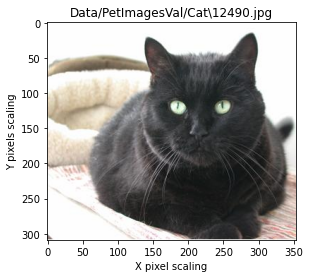

cat
1/1 [==============================] - 0s 16ms/step


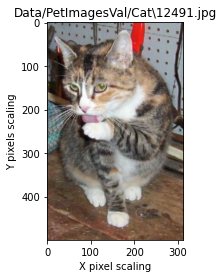

cat
1/1 [==============================] - 0s 16ms/step


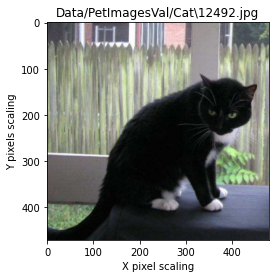

dog
1/1 [==============================] - 0s 16ms/step


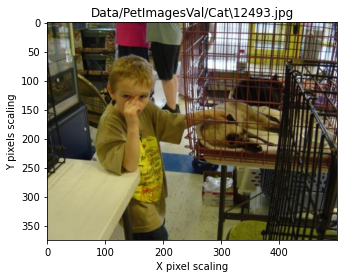

dog
1/1 [==============================] - 0s 15ms/step


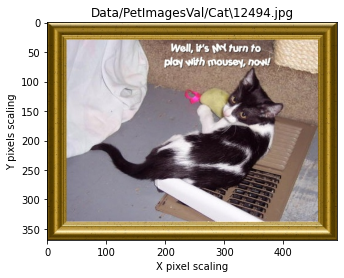

dog
1/1 [==============================] - 0s 16ms/step


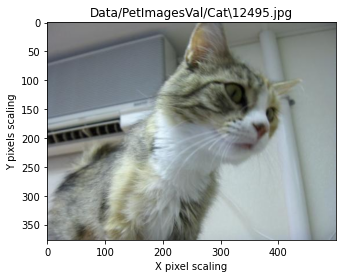

dog
1/1 [==============================] - 0s 17ms/step


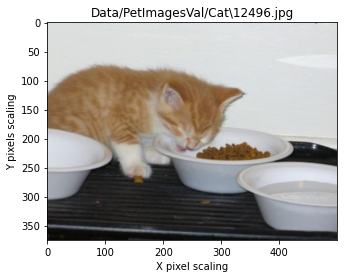

cat
1/1 [==============================] - 0s 16ms/step


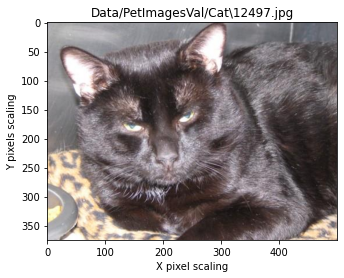

cat
1/1 [==============================] - 0s 16ms/step


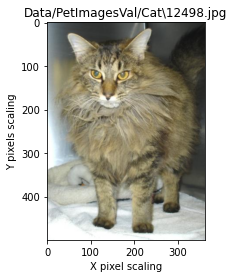

cat
1/1 [==============================] - 0s 17ms/step


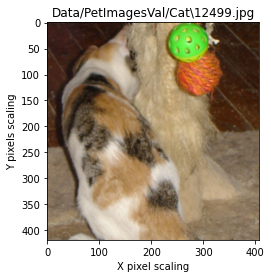

dog
1/1 [==============================] - 0s 15ms/step


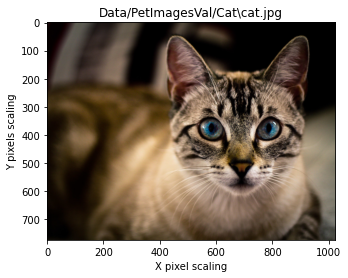

cat
6 5


In [36]:
correct = 0
Incorrect = 0
for path in Cats:
    test_image = tf.keras.utils.load_img(path, target_size = (128, 128))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
        
    plt.title(path)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
 
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.show()

    if prediction == 'cat':
        correct = correct + 1
    else:
        Incorrect = Incorrect + 1
        
    print(prediction)

print(correct, Incorrect)

1/1 [==============================] - 0s 15ms/step


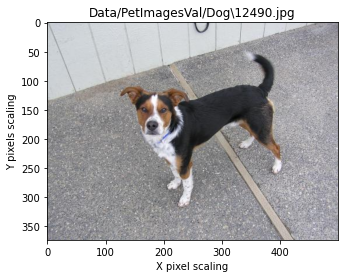

dog
1/1 [==============================] - 0s 15ms/step


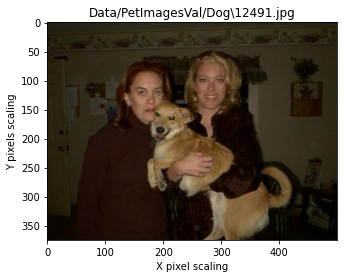

dog
1/1 [==============================] - 0s 15ms/step


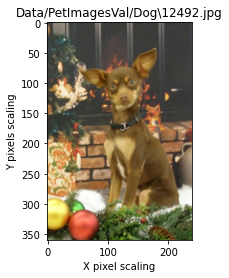

dog
1/1 [==============================] - 0s 16ms/step


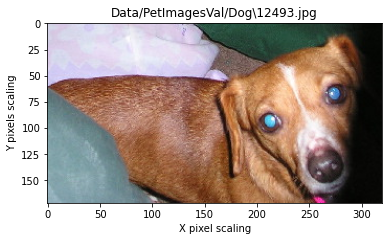

cat
1/1 [==============================] - 0s 17ms/step


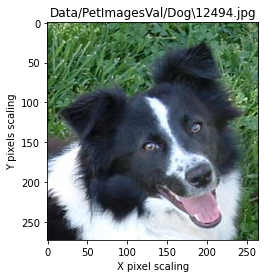

dog
1/1 [==============================] - 0s 16ms/step


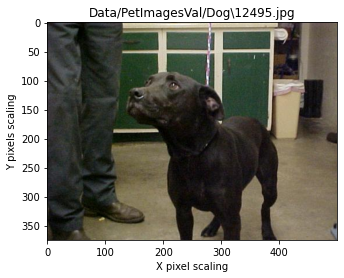

dog
1/1 [==============================] - 0s 16ms/step


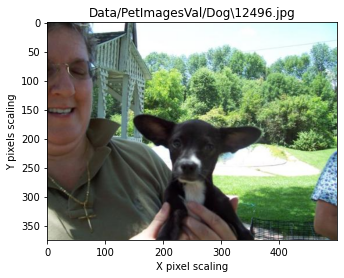

dog
1/1 [==============================] - 0s 17ms/step


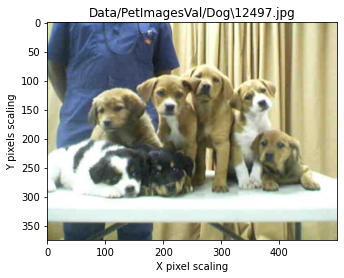

cat
1/1 [==============================] - 0s 16ms/step


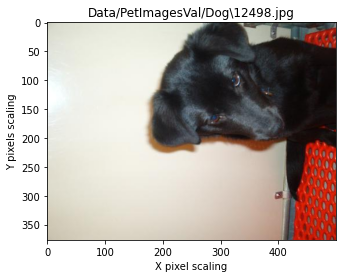

dog
1/1 [==============================] - 0s 15ms/step


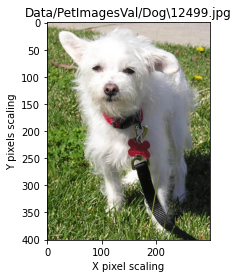

dog
8 2


In [37]:
correct = 0
Incorrect = 0
for path in Dogs:
    test_image = tf.keras.utils.load_img(path, target_size = (128, 128))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
        
    plt.title(path)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
 
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.show()
    
    if prediction == 'dog':
        correct = correct + 1
    else:
        Incorrect = Incorrect + 1

    print(prediction)
    
print(correct, Incorrect)

In [40]:
## change the path of the file to any file to test, PetImagesVal has two sub folders 
## one for dog one for cat, and about ten pictures of each inside
path = 'Data/PetImagesVal/The_Cat.jpg'

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

test_image = tf.keras.utils.load_img(path, target_size = (128, 128))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 [==============================] - 0s 17ms/step


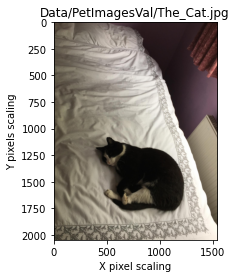

dog


In [42]:
plt.title(path)
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread(path)
plt.imshow(image)
plt.show()

print(prediction)